<a href="https://colab.research.google.com/github/zitoyeo/EDA-Modeling/blob/main/Super_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,960 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123633 files and dire

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set(font_scale = 1)
plt.rc('font', family= 'NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# 구글 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#데이터 불러오기
sp = pd.read_csv('/content/drive/MyDrive/Superstore Data.csv')

In [ ]:
# 데이터 일단 보기
sp.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### - Row ID: 일련번호
#### - Order ID : 주문코드(주문시마다 생성되는 트랜잭션 ID)
#### - Order Date : 주문일자
#### - Ship Date: 배송일자
#### - Ship Mode: 선적유형(1st/2nd/Standard Class)
#### - Customer ID : 고객 ID
#### - Customer Name : 고객성명
#### - Segment:주문 세그먼트(Consumer / Corperate/ Home Office)
#### - Country : 주문 국가(모두 US)
#### - City: 주문도시
#### - State : 주문수
#### - Postal Code: 주문 우편번호
#### - Region : 주문지역(Central / East / South /West)
#### - Product Name : 카테고리 - 중분류
#### - Sales : 판매가
#### - Quantity : 판매량
#### - Discount : 할인가
#### - Profit : 마진


In [ ]:
# 데이터 기본 정보 확인하기
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# 범주형 변수 : 빈도 frequency 계산 가능
# orderid, ship mode, customer id, customer name, segment,
# country, city, state, postal code, region, product id, category, sub-category, product name

In [ ]:
# 연속형 변수 : 평균, 표준편차, min/max등 수치 계산 가능
# 시간변수(orderdate, shipdate), sales, Quantity, discount, profit

In [ ]:
# 범주형 데이터의 통계치 확인하기
sp.describe(include='object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,2016-09-05,2015-12-16,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [ ]:
# 데이터 내용 정리해서 출력하기
print('총 데이터 수 :' , sp.shape[0] * sp.shape[1])
print('총 결측치 수 : {} = 전체 데이터의 {:.2f} %'.format(sp.isnull().sum().sum(), (sp.isnull().sum().sum()*100) / (sp.shape[0] * sp.shape[0])))
print('데이터 기간: {} ~ {}'.format(min(sp['Order Date']), max(sp['Order Date'])))
print('전체 판매 물건 수 :' , sp['Product ID'].nunique())


총 데이터 수 : 209874
총 결측치 수 : 0 = 전체 데이터의 0.00 %
데이터 기간: 2014-01-03 ~ 2017-12-30
전체 판매 물건 수 : 1862


## - 질문하기
### 어떤 종류의 물건(sub-category)이 가장 많이 팔렸을까 ?
### 어느 도시에서 주문량이 가장 많았을까?
### 세그먼트와 지역에 따른 주문량과 판매금액은?
### 할인률이 높을수록 마진이 낮을까?
### 어떤 종류의 상품이 매출이 가장 높을까 ?
### 지도 위에 판매량을 나타낼 수 있을까?


In [ ]:
# type 변경 (Order Date, Ship Date) -> datetime64[ns]

In [ ]:
sp['Order Date'] = pd.to_datetime(sp['Order Date'])
sp['Ship Date'] = pd.to_datetime(sp['Ship Date'])

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## 3.데이터 정비하기
#### 3-1 중복데이터 처리하기

In [ ]:
#중복데이터 확인
sp.duplicated().sum()

0

3-2 컬럼명 바꾸기

In [ ]:
sp.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
sp.columns = ['row_id','order_id','order_date','ship_date','ship_mode','cust_id','cust_name','seg'
,'country' ,'city','state','post_code','region','product_id','category','subcategory','product_name'
,'sales','quantity','discount','profit']

In [ ]:
sp.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'cust_id',
       'cust_name', 'seg', 'country', 'city', 'state', 'post_code', 'region',
       'product_id', 'category', 'subcategory', 'product_name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')

In [ ]:
# 필요없는 컬럼 제거하기

sp1 = sp.drop(['post_code'], axis =1)
sp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   row_id        9994 non-null   int64         
 1   order_id      9994 non-null   object        
 2   order_date    9994 non-null   datetime64[ns]
 3   ship_date     9994 non-null   datetime64[ns]
 4   ship_mode     9994 non-null   object        
 5   cust_id       9994 non-null   object        
 6   cust_name     9994 non-null   object        
 7   seg           9994 non-null   object        
 8   country       9994 non-null   object        
 9   city          9994 non-null   object        
 10  state         9994 non-null   object        
 11  region        9994 non-null   object        
 12  product_id    9994 non-null   object        
 13  category      9994 non-null   object        
 14  subcategory   9994 non-null   object        
 15  product_name  9994 non-null   object  

### 4. EDA & Visualization

#### 4-1. 간단한 분석

In [ ]:
#주문 순위 Top 10인 상품
sp1['product_name'].value_counts().head(10)

,count
product_name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
Staple remover,18
KI Adjustable-Height Table,18
Storex Dura Pro Binders,17
Staple-based wall hangings,16


<Axes: xlabel='category', ylabel='discount'>

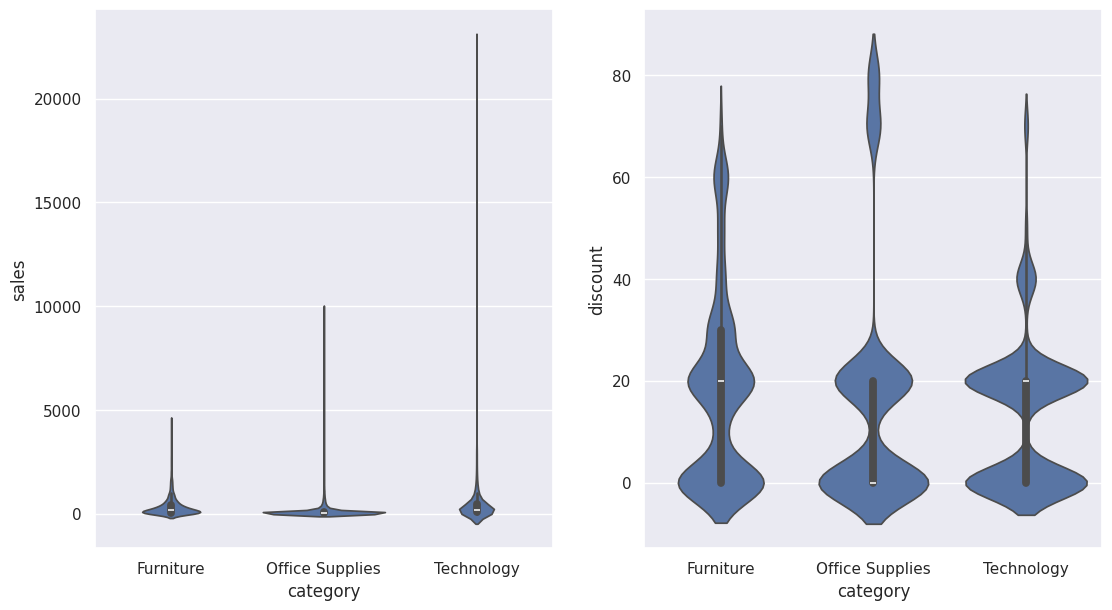

In [ ]:
#Violin plot으로 카테고리별 판매 금액과 할인율의 분포 확인하기
f, ax = plt.subplots(1,2, figsize=(13,7))

# violin plot
sns.violinplot(x=sp1['category'], y=sp1['sales'], ax=ax[0])
sns.violinplot(x=sp1['category'], y=sp1['discount']*100, ax=ax[1])

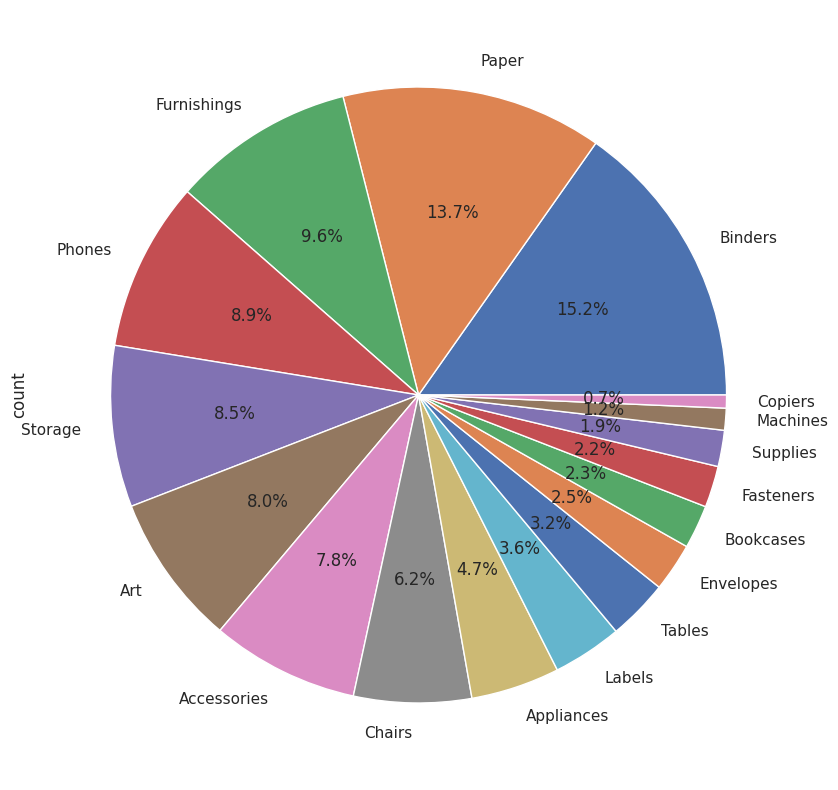

In [ ]:
# sub-category 기준으로 어떤 것이 가장 주문량이 많은가? 비율은?
# pie graph로 나타내자

plt.figure(figsize=(13,10))

sp1['subcategory'].value_counts().plot.pie(autopct="%1.1f%%")

plt.show()

#### 4.2 주 별 주문량 확인하기

In [ ]:
#주문량이 가장 많은 도시
too_cities = sp['city'].value_counts().head(20)
too_cities

,count
city,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
Houston,377
Chicago,314
Columbus,222
San Diego,170


<ipython-input-39-e3be184c246c>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)  # 레이블 회전 적용
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/u

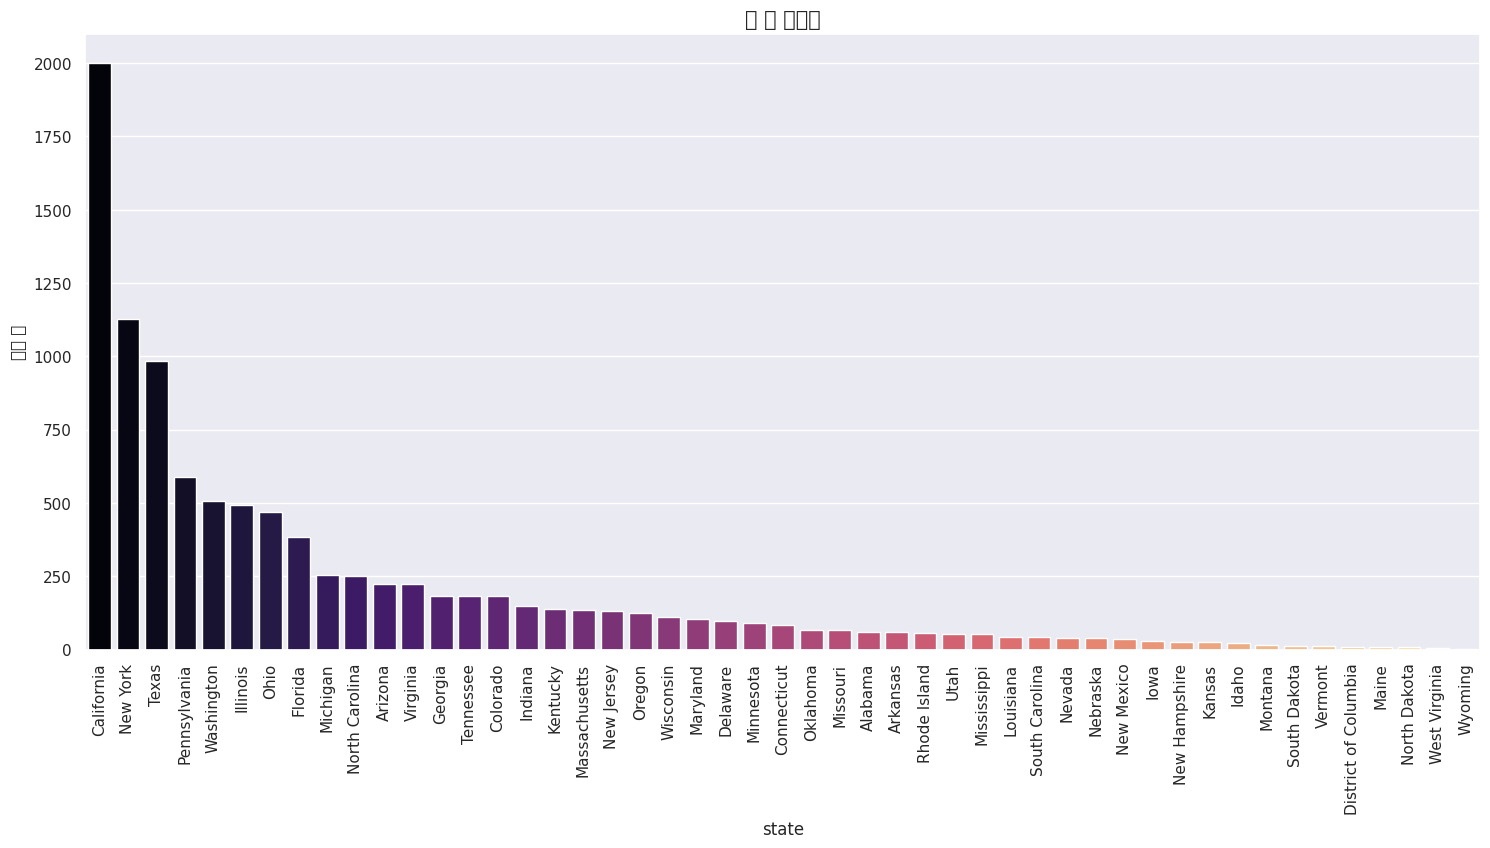

In [ ]:
# 주문량이 많은 도시를 그래프로 그려보자
# 많은 순서대로 정렬된 인덱스 추출
sorted_states = sp1['state'].value_counts().index

# 그래프 그리기
f, ax = plt.subplots(1, 1, figsize=(18, 8))
g = sns.countplot(x='state', data=sp1, order=sorted_states, ax=ax, palette='magma')  # 많은 순서대로 정렬 적용
g.set_xticklabels(g.get_xticklabels(), rotation=90)  # 레이블 회전 적용
g.set_title('주 별 주문량', size=15)
g.set_ylabel('주문 수')

plt.show()


### 4-3. 세그먼트/지역별 주문량

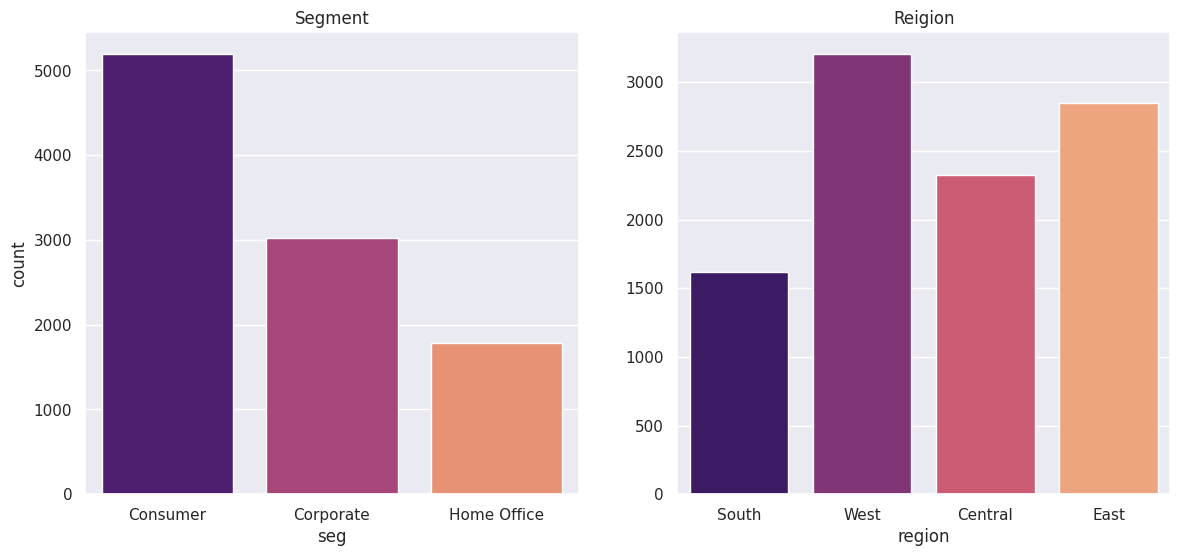

In [ ]:
# 세그먼트 별 , 지역별 주문량
# Consumer seg가 가장 주문량이많고, 서부의 주문량이 가장 많다
f, ax = plt.subplots(1,2, figsize=(14,6))

sns.countplot(x=sp1['seg'], palette='magma', ax=ax[0])
ax[0].set_title('Segment')

sns.countplot(x=sp1['region'], palette='magma', ax=ax[1])
ax[1].set_title('Reigion')
ax[1].set_ylabel('')

plt.show()

#4.4 할인률에 따른 마진

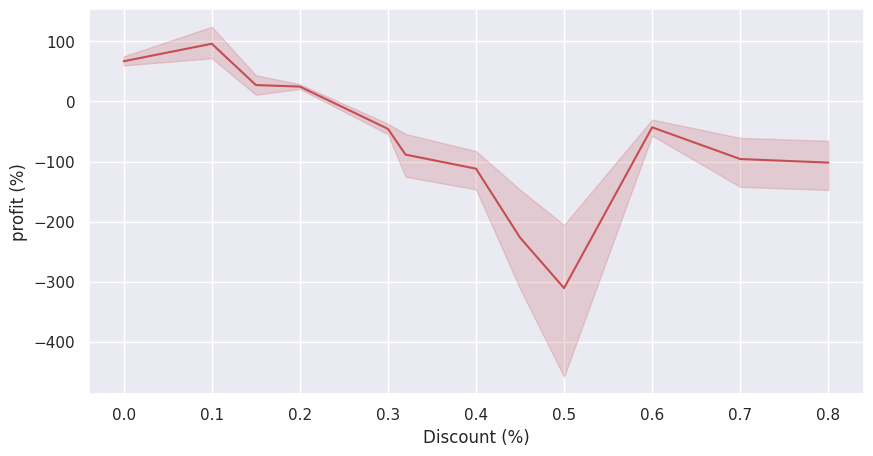

In [ ]:
#sns.lineplot은 : 추정회귀선과 신뢰구간을 같이 획안할 수 있다.
# 면적은 신뢰 구간을 나타낸다
# estimator=None 으로 두면 x값에 y가 여러개므로 이상한 그래프가 나옴.
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.lineplot(x='discount', y='profit', data=sp1, color ='r', ax=ax)

ax.set_xlabel('Discount (%)')
ax.set_ylabel('profit (%)')

plt.show()

# 4-5 상관관계 히트맵 그리기

In [ ]:
#상관관계 구하기 (수치형 변수(sales, quantity, discount, profit)) 사이의 상관관계를 모두 계산해 준다.
sp_corr = sp1[['sales','quantity','discount','profit']].corr()
sp_corr

,sales,quantity,discount,profit
sales,1.000000,0.200795,-0.028190,0.479064
quantity,0.200795,1.000000,0.008623,0.066253
discount,-0.028190,0.008623,1.000000,-0.219487
profit,0.479064,0.066253,-0.219487,1.000000


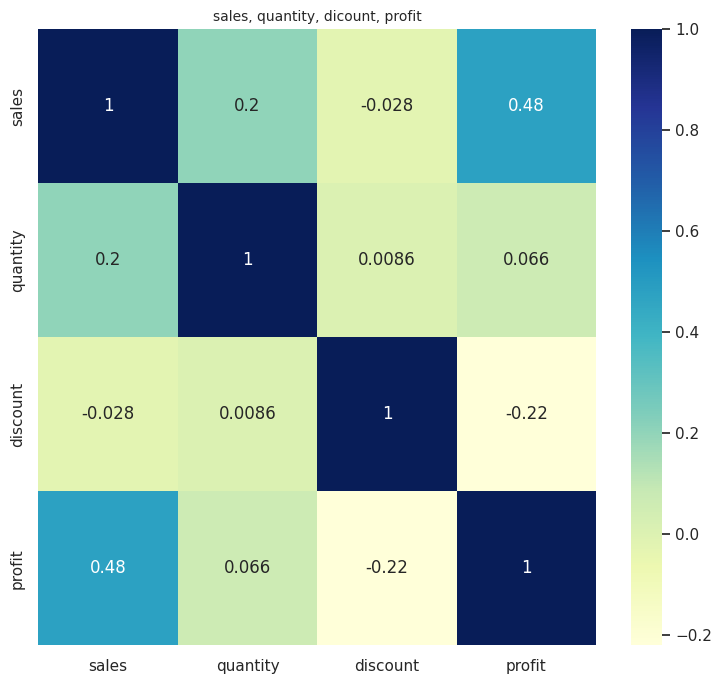

In [ ]:
# 상관관계를 열지도(Heat map)으로 나타내자
f,ax = plt.subplots(1,1, figsize=(9,8))
sns.heatmap(sp_corr, annot=True, cmap='YlGnBu', ax=ax)
plt.title('sales, quantity, dicount, profit', size =10)
plt.show()

# 판매가 많은 수록 이익이 높음
# 할인율이 높을수록 마진은 적음

# 4-6 판매금액에 따른 상위 품목 10개

In [ ]:
sp1

,row_id,order_id,order_date,ship_date,ship_mode,cust_id,cust_name,seg,country,city,state,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
#상품명으로 집계했을때 매출액 높은 순 상위 10개
top_prd = (
    sp1.select_dtypes(include=['number'])  # 숫자형 데이터만 선택
       .join(sp1['product_name'])  # 'product_name'은 다시 추가 (그룹화 기준)
       .groupby(['product_name'])
       .sum()
       .sort_values('sales', ascending=False)  # sales 기준 정렬
       .head(10)  # 상위 10개만 추출
)

In [ ]:
top_prd

,row_id,sales,quantity,discount,profit
product_name,,,,,
Canon imageCLASS 2200 Advanced Copier,28222,61599.824,20,0.6,2.519993e+04
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,61859,27453.384,31,2.4,7.753039e+03
Cisco TelePresence System EX90 Videoconferencing Unit,2698,22638.480,6,0.5,-1.811078e+03
HON 5400 Series Task Chairs for Big and Tall,44560,21870.576,39,1.6,5.684342e-14
GBC DocuBind TL300 Electric Binding System,64915,19823.479,37,3.3,2.233505e+03
GBC Ibimaster 500 Manual ProClick Binding System,57937,19024.500,48,4.7,7.609800e+02
Hewlett Packard LaserJet 3310 Copier,41444,18839.686,38,1.6,6.983884e+03
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",19245,18374.895,12,0.5,4.094977e+03
GBC DocuBind P400 Electric Binding System,27597,17965.068,27,2.7,-1.878166e+03


In [ ]:
# reset index로 다시 새로운 데이터프레임만든다
top_prd.reset_index(inplace = True)
top_prd

,product_name,row_id,sales,quantity,discount,profit
0,Canon imageCLASS 2200 Advanced Copier,28222,61599.824,20,0.6,2.519993e+04
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,61859,27453.384,31,2.4,7.753039e+03
2,Cisco TelePresence System EX90 Videoconferenci...,2698,22638.480,6,0.5,-1.811078e+03
3,HON 5400 Series Task Chairs for Big and Tall,44560,21870.576,39,1.6,5.684342e-14
4,GBC DocuBind TL300 Electric Binding System,64915,19823.479,37,3.3,2.233505e+03
5,GBC Ibimaster 500 Manual ProClick Binding System,57937,19024.500,48,4.7,7.609800e+02
6,Hewlett Packard LaserJet 3310 Copier,41444,18839.686,38,1.6,6.983884e+03
7,HP Designjet T520 Inkjet Large Format Printer ...,19245,18374.895,12,0.5,4.094977e+03
8,GBC DocuBind P400 Electric Binding System,27597,17965.068,27,2.7,-1.878166e+03
9,High Speed Automatic Electric Letter Opener,13590,17030.312,11,0.2,-2.620048e+02


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

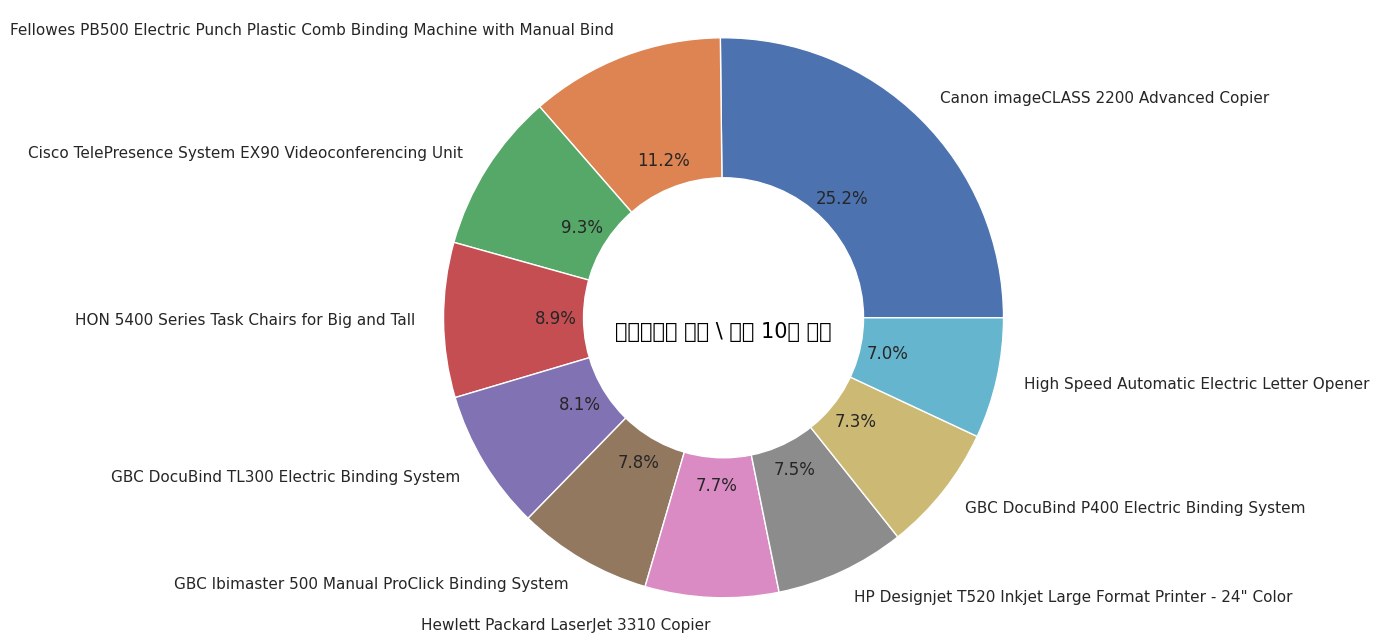

In [ ]:
#Pie그래프로 상위 10개 품목의 판매 금액에 대한 비율 나타내기
f,ax = plt.subplots(1,1, figsize=(9,8))

ax.pie(top_prd['sales'], labels=top_prd['product_name'], autopct="%1.1f%%", startangle=0)
ax.set_ylabel('')

#흰색 원 덧대기
center_circle = plt.Circle((0,0), 0.5, fc='white')
fig =plt.gcf() #그래프 상의 위치를 위한 함수
fig.gca().add_artist(center_circle)

ax.axis('equal') #파이그래프와 원이 중심축 같도록 지정
label = ax.annotate('판매금액에 따른 \ 상위 10개 품목', color='black', xy=(0,-0.07), fontsize= 15, ha="center")

plt.show()

# 4.7 주 별 총 판매금액을 지도위에 반응형으로 나타내기

In [ ]:
# 주별로 판매금액(sales)을 지도위에 나타내자
# 주 별로 판매금액을 집게하자
# 숫자형 데이터만 선택 후 그룹화
state_sales = (
    sp1.select_dtypes(include=['number'])  # 숫자형 컬럼만 선택
       .join(sp1['state'])  # 그룹화 기준인 'state' 추가
       .groupby('state')  # 'state'로 그룹화
       .sum()  # 합산
       .sort_values('sales', ascending=False)  # 'sales' 기준으로 정렬
)
state_sales.reset_index(inplace=True)
state_sales

,state,row_id,sales,quantity,discount,profit
0,California,10137449,457687.6315,7667,145.60,76381.3871
1,New York,5452096,310876.2710,4224,62.40,74038.5486
2,Texas,5085541,170188.0458,3724,364.64,-25729.3563
3,Washington,2584458,138641.2700,1883,32.40,33402.6517
4,Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603
5,Florida,1958255,89473.7080,1379,114.65,-3399.3017
6,Illinois,2571481,80166.1010,1845,191.90,-12607.8870
7,Ohio,2355994,78258.1360,1759,152.40,-16971.3766
8,Michigan,1200167,76269.6140,946,1.80,24463.1876
9,Virginia,1218137,70636.7200,893,0.00,18597.9504


In [ ]:
#워싱턴 dc는 제거
dc = state_sales[state_sales['state'] == 'District of Columbia'].index
state_sales = state_sales.drop(dc)
state_sales

,state,row_id,sales,quantity,discount,profit
0,California,10137449,457687.6315,7667,145.60,76381.3871
1,New York,5452096,310876.2710,4224,62.40,74038.5486
2,Texas,5085541,170188.0458,3724,364.64,-25729.3563
3,Washington,2584458,138641.2700,1883,32.40,33402.6517
4,Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603
5,Florida,1958255,89473.7080,1379,114.65,-3399.3017
6,Illinois,2571481,80166.1010,1845,191.90,-12607.8870
7,Ohio,2355994,78258.1360,1759,152.40,-16971.3766
8,Michigan,1200167,76269.6140,946,1.80,24463.1876
9,Virginia,1218137,70636.7200,893,0.00,18597.9504


In [ ]:
#그림을 그리기 위해 state_code를 붙여준다
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
         'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

#데이터프레임을 만들어서 stte_cd와 주 이름을 붙여준다
state_cd = pd.DataFrame(state, state_code)
state_cd
state_cd.reset_index(inplace=True)
state_cd.columns = ['state_cd','state']
state_cd

,state_cd,state
0,AL,Alabama
1,AZ,Arizona
2,AR,Arkansas
3,CA,California
4,CO,Colorado
5,CT,Connecticut
6,DE,Delaware
7,FL,Florida
8,GA,Georgia
9,ID,Idaho


In [ ]:
#state_cd를 붙여주기 위해 sales 데이터프레임을 State 순으로 정렬한 후 인덱스를 새로 매겨준다
state_sales= state_sales.sort_values('state', ascending=True)
state_sales.reset_index(inplace = True)
state_sales.insert(1, 'state_cd', state_cd['state_cd'])
state_sales

,index,state_cd,state,row_id,sales,quantity,discount,profit
0,26,AL,Alabama,243876,19510.6400,256,0.00,5786.8253
1,15,AZ,Arizona,1019876,35282.0010,862,68.00,-3427.9246
2,30,AR,Arkansas,304575,11678.1300,240,0.00,4008.6871
3,0,CA,California,10137449,457687.6315,7667,145.60,76381.3871
4,17,CO,Colorado,797002,32108.1180,693,57.60,-6527.8579
5,29,CT,Connecticut,444411,13384.3570,281,0.60,3511.4918
6,21,DE,Delaware,504370,27451.0690,367,0.60,9977.3748
7,5,FL,Florida,1958255,89473.7080,1379,114.65,-3399.3017
8,12,GA,Georgia,883590,49095.8400,705,0.00,16250.0433
9,41,ID,Idaho,129427,4382.4860,64,1.80,826.7231


In [ ]:
state_sales.drop('index', axis=1, inplace=True)
state_sales

,state_cd,state,row_id,sales,quantity,discount,profit
0,AL,Alabama,243876,19510.6400,256,0.00,5786.8253
1,AZ,Arizona,1019876,35282.0010,862,68.00,-3427.9246
2,AR,Arkansas,304575,11678.1300,240,0.00,4008.6871
3,CA,California,10137449,457687.6315,7667,145.60,76381.3871
4,CO,Colorado,797002,32108.1180,693,57.60,-6527.8579
5,CT,Connecticut,444411,13384.3570,281,0.60,3511.4918
6,DE,Delaware,504370,27451.0690,367,0.60,9977.3748
7,FL,Florida,1958255,89473.7080,1379,114.65,-3399.3017
8,GA,Georgia,883590,49095.8400,705,0.00,16250.0433
9,ID,Idaho,129427,4382.4860,64,1.80,826.7231


In [ ]:
#plotly를 사용해서 반응형 그래프를 그려보자
import plotly.express as px

fig = px.choropleth(locations=state_sales['state_cd'], locationmode="USA-states", color=state_sales['sales'], scope="usa"
, color_continuous_scale='peach', title='주 별 총 판매금액')

fig.show()

#### - online retail 데이터는
#### 총 데이터수 : 209874
#### 총 결측치수 : 0
#### 데이터 기간 : 2014-01-03 00:00:00 ~ 2017~12-30 00:00:00
#### 전체 판매 물건 수 : 1862
#### - 어떤 종류의 물건(sub-category)이 가장많이 팔렸을까?
#### : binder가 15.2%로 많이 팔림
#### - 어느 도시에서 주문량이 가장 많았을까?
#### : 캘리포니아, 뉴욕, 텍사스 순으로 주문량이 많았다.
#### - 세그먼트와 지역에 따른 주문량
#### : Consumer seg가 가장 주문량이 많고, 서부 주문량이 가장 많다.
#### - 할인률이 높을 수록 마진이 낮을까>?
#### : 할인률이 50% 일때 마진이 가장 낮다.
#### - 어떤 종류의 상품이 매출이 가장 높을까 ? : canon imageCLASS의 판매금액 젤 높음
#### - 지도위에 나타낼수 있을까?

